In [111]:
from pathlib import Path 
from collections import defaultdict
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [112]:
data = pd.read_csv('brba.csv')
data.head()

,First Characters Name,Second Characters Name,Season,Episode
0,Walter White,Jesse Pinkman,Season 1,Episode 1
1,Walter White,Skyler White,Season 1,Episode 1
2,Walter White,Walt JR,Season 1,Episode 1
3,Skyler White,Walt JR,Season 1,Episode 1
4,Walter White,Walt JR,Season 1,Episode 1


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   First Characters Name   1719 non-null   object
 1   Second Characters Name  1719 non-null   object
 2   Season                  1719 non-null   object
 3   Episode                 1719 non-null   object
dtypes: object(4)
memory usage: 53.8+ KB


In [114]:
G = nx.Graph()

In [115]:
likovi = pd.unique(data[['First Characters Name', 'Second Characters Name']].values.ravel())
likovi

array(['Walter White', 'Jesse Pinkman', 'Skyler White', 'Walt JR',
       'Bogdan', 'Marie Schrader', 'Hank Schrader', 'Steven Gomez',
       'Doctor #1', 'Emilio Koyama', 'Krazy 8', 'Student #1',
       'Backhoe operator', 'Student #2', 'Gretchen Schwartz', 'Wendy',
       'Combo', 'Skinny Pete', 'Ken', 'Diane Pinkman', 'Adam Pinkman',
       'Jake Pinkman', 'Dr Delcavoli', 'Badger', 'Elliott Schwartz',
       'Hugo Archilleya', 'Carmen Molina', 'Tuco Salamanca', 'No-Doze',
       'Gonzo', 'Tim Roberts', 'Hector Salamanca', 'Austin Ramsey',
       'George Merket', 'Psychiatrist', 'Paul Tyree', 'Clovis',
       'Jane Margolis', 'Spooge', "Spooge's Wife", "Spooge's Son",
       'Student #3', 'Ted Beneke', 'Vanco', 'Tortuga', 'Getz',
       'Saul Goodman', 'Donald Margolis', 'Tweaky Dude', 'Rival Dealers',
       'Tomas Cantillo', 'Gustavo Fring', 'Victor', 'Holly White',
       'Mike Ehrmantraut', 'Marco Salamanca', 'Leonel Salamanca',
       'Pamela Orbic', 'Group Leader', 'Policeman #

In [116]:
G.add_nodes_from(likovi)


In [117]:
for _, row in data.iterrows():
    c1 = row['First Characters Name']
    c2 = row['Second Characters Name']
    
    if G.has_edge(c1, c2):
        G[c1][c2]['weight'] += 1
    else:
        G.add_edge(c1, c2, weight=1)

print("Cvorovi:", G.nodes())
print("Grane sa tezinama:", G.edges(data=True))
print("Broj cvorova: ", G.number_of_nodes())
print("Broj grana: ", G.number_of_edges())

Cvorovi: ['Walter White', 'Jesse Pinkman', 'Skyler White', 'Walt JR', 'Bogdan', 'Marie Schrader', 'Hank Schrader', 'Steven Gomez', 'Doctor #1', 'Emilio Koyama', 'Krazy 8', 'Student #1', 'Backhoe operator', 'Student #2', 'Gretchen Schwartz', 'Wendy', 'Combo', 'Skinny Pete', 'Ken', 'Diane Pinkman', 'Adam Pinkman', 'Jake Pinkman', 'Dr Delcavoli', 'Badger', 'Elliott Schwartz', 'Hugo Archilleya', 'Carmen Molina', 'Tuco Salamanca', 'No-Doze', 'Gonzo', 'Tim Roberts', 'Hector Salamanca', 'Austin Ramsey', 'George Merket', 'Psychiatrist', 'Paul Tyree', 'Clovis', 'Jane Margolis', 'Spooge', "Spooge's Wife", "Spooge's Son", 'Student #3', 'Ted Beneke', 'Vanco', 'Tortuga', 'Getz', 'Saul Goodman', 'Donald Margolis', 'Tweaky Dude', 'Rival Dealers', 'Tomas Cantillo', 'Gustavo Fring', 'Victor', 'Holly White', 'Mike Ehrmantraut', 'Marco Salamanca', 'Leonel Salamanca', 'Pamela Orbic', 'Group Leader', 'Policeman #1', 'Kaylee Erhmantraut', 'Juan Bolsa', 'Policeman #2', 'Louis Corbett', 'Cara', "Combo's Mothe

In [118]:
broj_pojavljivanja = {}
for lik in G.nodes():
    count = (data['First Characters Name'] == lik).sum() + (data['Second Characters Name'] == lik).sum()
    broj_pojavljivanja[lik] = count

node_sizes = [broj_pojavljivanja[lik] + 10 for lik in G.nodes()]
node_colors = [broj_pojavljivanja[lik] for lik in G.nodes()]


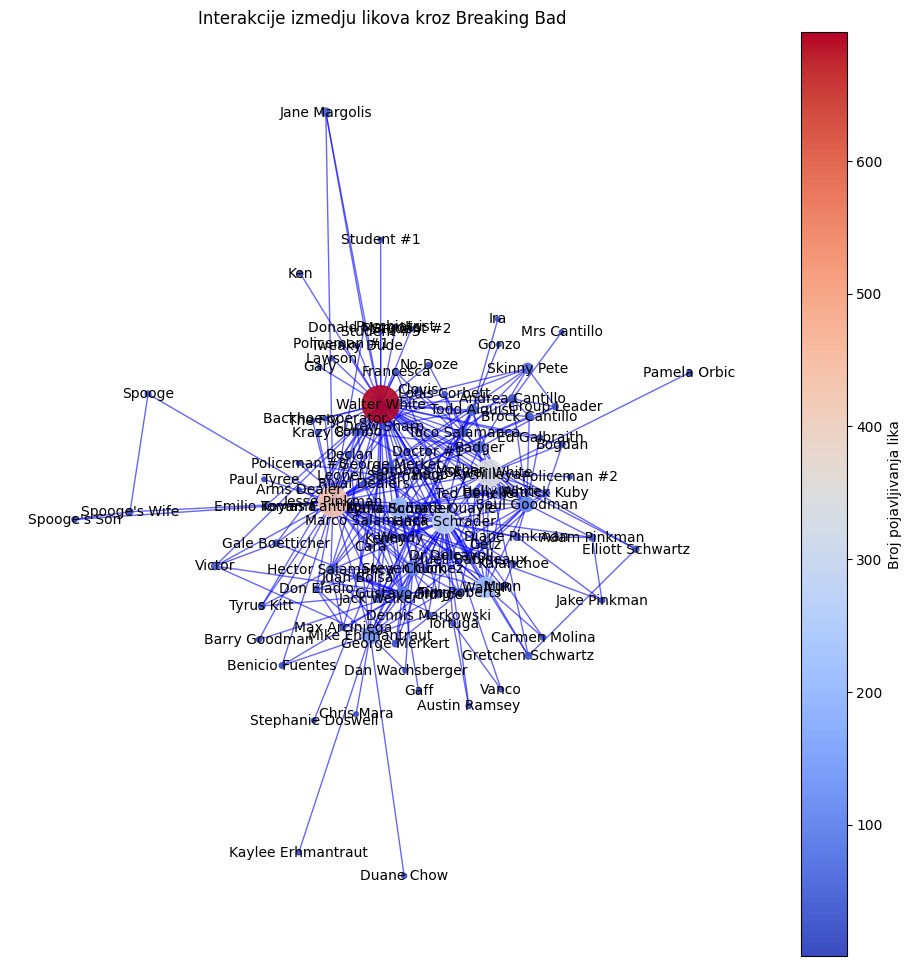

In [119]:
plt.figure(figsize=(12,12))
ax = plt.gca()
pos = nx.kamada_kawai_layout(G, weight='weight')

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.coolwarm, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.6, edge_color='blue')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Broj pojavljivanja lika")

plt.title("Interakcije izmedju likova kroz Breaking Bad")

plt.axis('off')
plt.show()

In [120]:
gustina = nx.density(G)
print("Gustina mreze: ", gustina)

Gustina mreze:  0.05901766647252961


In [121]:
components = list(nx.connected_components(G))
number_of_components = nx.number_connected_components(G)
largest_component_size = len(max(components, key=len))

print("Broj povezanih komponenti: ", number_of_components)
print("Velicina najvece komponente: ", largest_component_size)

Broj povezanih komponenti:  1
Velicina najvece komponente:  102


In [122]:
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print("Prosecan broj veza po liku je: ", avg_degree)

Prosecan broj veza po liku je:  5.96078431372549


In [123]:
degrees = dict(G.degree())
max_degree = max(degrees.values())
min_degree = min(degrees.values())

print("Maksimalan stepen: ", max_degree)
print("Minimalan stepen: ", min_degree)

Maksimalan stepen:  60
Minimalan stepen:  1


In [124]:
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print("Dijametar grafa: ", diameter)

if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
    print("Prosecna duzina puta je: ", avg_path_length)

avg_clustering = nx.average_clustering(G)
print("Prosecni klastering koeficijent: ", avg_clustering)

Dijametar grafa:  4
Prosecna duzina puta je:  2.337798485730926
Prosecni klastering koeficijent:  0.6118146035091021


In [125]:
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po stepenu centralnosti: ", sorted_degree[:5])

Top 5 likova po stepenu centralnosti:  [('Walter White', 0.594059405940594), ('Jesse Pinkman', 0.504950495049505), ('Hank Schrader', 0.37623762376237624), ('Skyler White', 0.2079207920792079), ('Gustavo Fring', 0.2079207920792079)]


In [126]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po blizinskoj centralnosti: ", sorted_closeness[:5])

pd.Series(closeness_centrality.values()).describe()

Top 5 likova po blizinskoj centralnosti:  [('Walter White', 0.7112676056338029), ('Jesse Pinkman', 0.6601307189542484), ('Hank Schrader', 0.608433734939759), ('Steven Gomez', 0.5401069518716578), ('Gustavo Fring', 0.5401069518716578)]


count    102.000000
mean       0.436376
std        0.064326
min        0.318612
25%        0.402390
50%        0.431632
75%        0.464904
max        0.711268
dtype: float64

In [127]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, weight='weight')
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po centralnosti posrednistva: ", sorted_betweenness[:5])

Top 5 likova po centralnosti posrednistva:  [('Walter White', 0.3217456865813822), ('Hank Schrader', 0.2675247846473483), ('Jesse Pinkman', 0.20667151982983148), ('Skyler White', 0.09356229908705155), ('Steven Gomez', 0.08548429412056303)]


In [128]:
eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')
sorted_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po eigen centralnosti: ", sorted_eigen[:5])

Top 5 likova po eigen centralnosti:  [('Walter White', 0.6165685891948576), ('Skyler White', 0.4391665742417597), ('Jesse Pinkman', 0.39885887435104944), ('Walt JR', 0.2947473411944661), ('Hank Schrader', 0.24407316544383495)]


In [129]:
from networkx.algorithms.community import louvain_communities

communities = louvain_communities(G, weight='weight', seed=42)
for i, community in enumerate(communities):
    print(f"Zajednica {i+1}: ", community)


Zajednica 1:  {'Francesca', 'Diane Pinkman', 'Adam Pinkman', 'Paul Tyree', 'Skinny Pete', 'Brock Cantillo', 'Patrick Kuby', 'Mike Ehrmantraut', 'Duane Chow', 'Gretchen Schwartz', 'Clovis', 'Gonzo', 'Student #3', 'Hugo Archilleya', 'Ken', 'Saul Goodman', 'Gary', 'Kaylee Erhmantraut', 'Bogdan', 'Psychiatrist', 'Tweaky Dude', 'Group Leader', 'Rival Dealers', 'Old Joe', 'Wendy', 'Policeman #1', 'Student #2', 'Carmen Molina', 'Jane Margolis', 'Badger', 'Mrs Cantillo', 'Emilio Koyama', 'The Fly', 'Getz', 'Jake Pinkman', 'Gale Boetticher', 'Declan', 'Ed Galbraith', 'Andrea Cantillo', 'Walter White', 'Tuco Salamanca', 'Chris Mara', 'No-Doze', 'Huell Babineaux', 'Victor', 'Backhoe operator', "Combo's Mother", 'Tomas Cantillo', 'Student #1', 'Donald Margolis', 'Krazy 8', 'Lawson', 'Combo', 'Elliott Schwartz', "Spooge's Son", 'Jesse Pinkman'}
Zajednica 2:  {'Walt JR', 'Cara', 'Stephanie Doswell', 'Ted Beneke', 'Tim Roberts', 'Louis Corbett', 'Skyler White', 'Dennis Markowski', 'Vanco', 'George Me

In [130]:
bridges = list(nx.bridges(G))
print("Mostovi u mrezi: ", bridges)

Mostovi u mrezi:  [('Walter White', 'Student #1'), ('Walter White', 'Student #2'), ('Walter White', 'Ken'), ('Walter White', 'Psychiatrist'), ('Walter White', 'Student #3'), ('Walter White', 'Tweaky Dude'), ('Walter White', 'Policeman #1'), ('Walter White', 'Lawson'), ('Walter White', 'Gary'), ('Jesse Pinkman', 'Paul Tyree'), ('Skyler White', 'Pamela Orbic'), ('Skyler White', 'Policeman #2'), ('Marie Schrader', 'Stephanie Doswell'), ('Tuco Salamanca', 'Gonzo'), ('Gustavo Fring', 'Gaff'), ('Mike Ehrmantraut', 'Kaylee Erhmantraut'), ('Mike Ehrmantraut', 'Duane Chow'), ('Mike Ehrmantraut', 'Chris Mara'), ('Andrea Cantillo', 'Mrs Cantillo'), ('Todd Alquist', 'Ira')]
